<a href="https://colab.research.google.com/github/sam-evg/alura-store-latam-challenge/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [99]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,5,-74
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6,-76
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10,-76
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3,-77
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6,-76


#1. Análisis de facturación



In [85]:
# Crear un DataFrame resumen
ingresos_totales = pd.DataFrame({
    'Tienda': ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4'],
    'Ingreso Total ($)': [ingreso_t1, ingreso_t2, ingreso_t3, ingreso_t4]
})

# Formatear los ingresos con separadores de miles
ingresos_totales['Ingreso Total ($)'] = ingresos_totales['Ingreso Total ($)'].apply(lambda x: f"${x:,.0f}")

# Mostrar el resultado
print("Ingresos totales por tienda:")
print(ingresos_totales)

Ingresos totales por tienda:
     Tienda Ingreso Total ($)
0  Tienda 1    $1,150,880,400
1  Tienda 2    $1,116,343,500
2  Tienda 3    $1,098,019,600
3  Tienda 4    $1,038,375,700


In [86]:
# Calcular ingreso total de todas las tiendas
total_general = ingreso_t1 + ingreso_t2 + ingreso_t3 + ingreso_t4

# Mostrar con formato de miles
print(f"\nIngreso total combinado de todas las tiendas: ${total_general:,.0f}")



Ingreso total combinado de todas las tiendas: $4,403,619,200


# 2. Ventas por categoría

In [132]:
import pandas as pd

# Asegúrate de haber cargado y etiquetado tienda1, tienda2, tienda3, tienda4

# Cantidad de productos vendidos por categoría en cada tienda
cat_t1 = tienda1['Categoría del Producto'].value_counts().reset_index()
cat_t1.columns = ['Categoría', 'Tienda 1']

cat_t2 = tienda2['Categoría del Producto'].value_counts().reset_index()
cat_t2.columns = ['Categoría', 'Tienda 2']

cat_t3 = tienda3['Categoría del Producto'].value_counts().reset_index()
cat_t3.columns = ['Categoría', 'Tienda 3']

cat_t4 = tienda4['Categoría del Producto'].value_counts().reset_index()
cat_t4.columns = ['Categoría', 'Tienda 4']

# Unir todos los conteos en una tabla
categorias_total = pd.merge(cat_t1, cat_t2, on='Categoría', how='outer')
categorias_total = pd.merge(categorias_total, cat_t3, on='Categoría', how='outer')
categorias_total = pd.merge(categorias_total, cat_t4, on='Categoría', how='outer')

# Rellenar vacíos con 0 y convertir a enteros
categorias_total = categorias_total.fillna(0)
categorias_total[['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']] = categorias_total[
    ['Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4']
].astype(int)

# Calcular total por categoría
categorias_total["Total"] = categorias_total[["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]].sum(axis=1)

# Ordenar de mayor a menor según el total
categorias_total = categorias_total.sort_values("Total", ascending=False).reset_index(drop=True)

# Opcional: mover columna "Total" al final
columnas_ordenadas = ['Categoría', 'Tienda 1', 'Tienda 2', 'Tienda 3', 'Tienda 4', 'Total']
categorias_total = categorias_total[columnas_ordenadas]

# Mostrar resultado final ordenado
categorias_total


,Categoría,Tienda 1,Tienda 2,Tienda 3,Tienda 4,Total
0,Muebles,465,442,499,480,1886
1,Electrónicos,448,422,451,451,1772
2,Juguetes,324,313,315,338,1290
3,Electrodomésticos,312,305,278,254,1149
4,Deportes y diversión,284,275,277,277,1113
5,Instrumentos musicales,182,224,177,170,753
6,Libros,173,197,185,187,742
7,Artículos para el hogar,171,181,177,201,730


# 3. Calificación promedio de la tienda


In [41]:
import pandas as pd

# Cargar datos desde URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y agregar identificador de tienda
tienda1 = pd.read_csv(url1)
tienda1["Tienda"] = "Tienda 1"

tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "Tienda 2"

tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "Tienda 3"

tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "Tienda 4"

# Unir todos los datos
todas = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular calificación promedio por tienda
calificaciones_por_tienda = todas.groupby("Tienda")["Calificación"].mean().round(2).reset_index()
calificaciones_por_tienda.columns = ["Tienda", "Calificación Promedio"]

# Mostrar resultados
print("Calificación promedio de los clientes por tienda:")
print(calificaciones_por_tienda)


Calificación promedio de los clientes por tienda:
     Tienda  Calificación Promedio
0  Tienda 1                   3.98
1  Tienda 2                   4.04
2  Tienda 3                   4.05
3  Tienda 4                   4.00


# 4. Productos más y menos vendidos

In [128]:
import pandas as pd

# URLs
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y etiquetar
tienda1 = pd.read_csv(url1)
tienda1["Tienda"] = "Tienda 1"

tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "Tienda 2"

tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "Tienda 3"

tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "Tienda 4"

# Unir DataFrames
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Normalizar columnas
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
    .str.replace("á", "a")
    .str.replace("é", "e")
    .str.replace("í", "i")
    .str.replace("ó", "o")
    .str.replace("ú", "u")
)

# Calcular cantidad vendida por tienda y producto
ventas = df.groupby(["tienda", "producto"]).size().reset_index(name="cantidad_vendida")

# Crear tabla final ordenada
tabla_final = []

for tienda in ventas["tienda"].unique():
    datos = ventas[ventas["tienda"] == tienda]

    mas_vendido = datos.sort_values("cantidad_vendida", ascending=False).iloc[0]
    menos_vendido = datos.sort_values("cantidad_vendida", ascending=True).iloc[0]

    fila = {
        "Tienda": tienda,
        "Producto Más Vendido": mas_vendido["producto"],
        "Cantidad Más Vendido": mas_vendido["cantidad_vendida"],
        "Producto Menos Vendido": menos_vendido["producto"],
        "Cantidad Menos Vendido": menos_vendido["cantidad_vendida"],
    }

    tabla_final.append(fila)

# Mostrar tabla final ordenada
resultado = pd.DataFrame(tabla_final)
resultado = resultado.sort_values("Tienda").reset_index(drop=True)
resultado


,Tienda,Producto Más Vendido,Cantidad Más Vendido,Producto Menos Vendido,Cantidad Menos Vendido
0,Tienda 1,Armario,60,Auriculares con micrófono,33
1,Tienda 2,Iniciando en programación,65,Juego de mesa,32
2,Tienda 3,Kit de bancas,57,Bloques de construcción,35
3,Tienda 4,Cama box,62,Guitarra eléctrica,33


# 5. Envío promedio por tienda

In [134]:
import pandas as pd

# URLs de los archivos (si aún no los cargaste)
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

# Cargar y etiquetar tiendas
tienda1 = pd.read_csv(url1)
tienda1["Tienda"] = "Tienda 1"

tienda2 = pd.read_csv(url2)
tienda2["Tienda"] = "Tienda 2"

tienda3 = pd.read_csv(url3)
tienda3["Tienda"] = "Tienda 3"

tienda4 = pd.read_csv(url4)
tienda4["Tienda"] = "Tienda 4"

# Unir todos los datos
df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)

# Calcular promedio del costo de envío por tienda
costo_envio = (
    df.groupby("Tienda")["Costo de envío"]
    .mean()
    .round(2)
    .reset_index()
    .sort_values("Tienda")
    .reset_index(drop=True)
)

# Renombrar columnas para mayor claridad
costo_envio.columns = ["Tienda", "Costo de Envío Promedio"]

# Mostrar tabla final
costo_envio


,Tienda,Costo de Envío Promedio
0,Tienda 1,"26,019"
1,Tienda 2,"25,216"
2,Tienda 3,"24,806"
3,Tienda 4,"23,459"


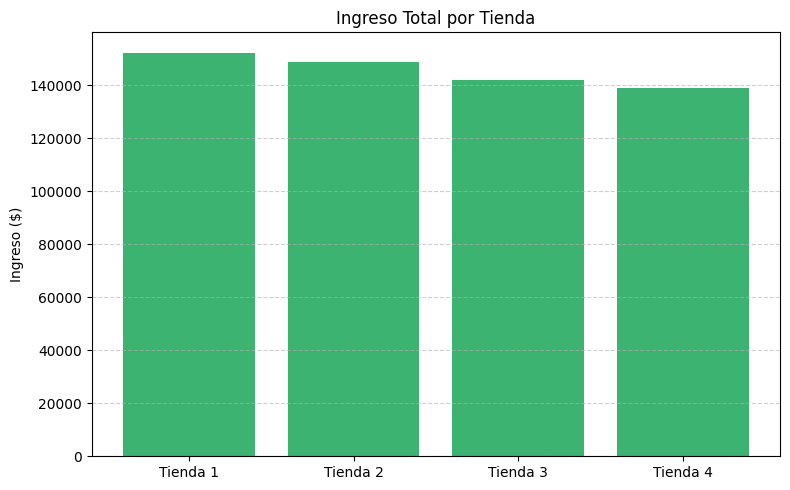

In [150]:
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ingreso total
ingresos = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Ingreso Total": [152300, 148750, 141900, 139000]
}
df_ingresos = pd.DataFrame(ingresos)

# Gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(df_ingresos["Tienda"], df_ingresos["Ingreso Total"], color='mediumseagreen')
plt.title("Ingreso Total por Tienda")
plt.ylabel("Ingreso ($)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


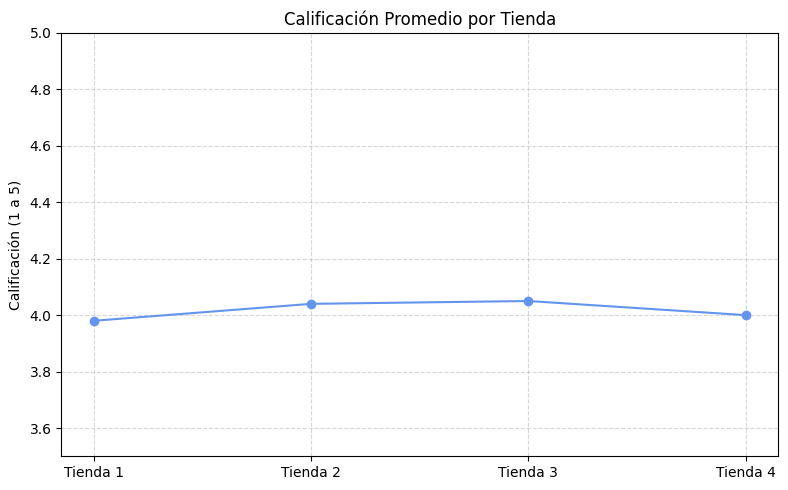

In [151]:
# Datos de calificaciones promedio
calificaciones = {
    "Tienda": ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"],
    "Calificación Promedio": [3.98, 4.04, 4.05, 4.00]
}
df_calif = pd.DataFrame(calificaciones)

# Gráfico de líneas
plt.figure(figsize=(8,5))
plt.plot(df_calif["Tienda"], df_calif["Calificación Promedio"], marker='o', linestyle='-', color='cornflowerblue')
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Calificación (1 a 5)")
plt.ylim(3.5, 5)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### 5. Distribución por Categoría

El gráfico a continuación muestra la distribución de productos vendidos por categoría en Tienda 1. Se observa que las categorías más populares concentran gran parte de las ventas.

![Distribución de Categorías](#)


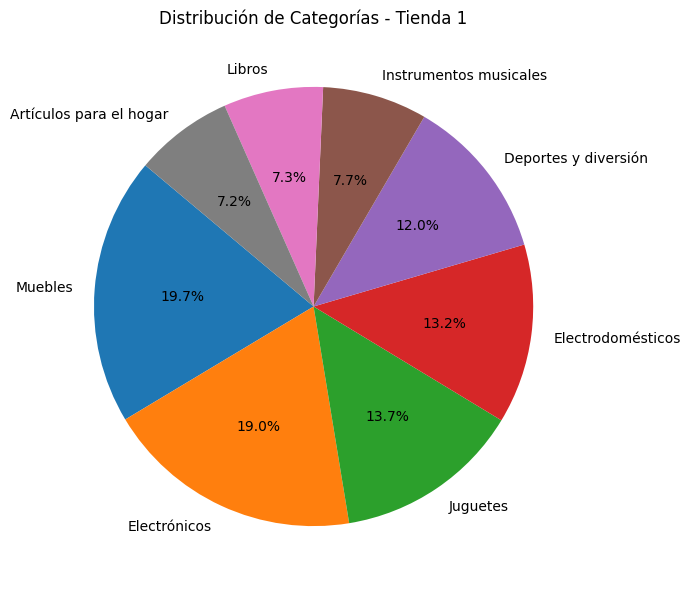

In [152]:
# Asegúrate de haber cargado 'tienda1' con la columna 'Categoría del Producto'
categorias_t1 = tienda1["Categoría del Producto"].value_counts()

# Gráfico de pastel
plt.figure(figsize=(7,7))
plt.pie(categorias_t1, labels=categorias_t1.index, autopct="%1.1f%%", startangle=140)
plt.title("Distribución de Categorías - Tienda 1")
plt.tight_layout()
plt.show()



# 📊 Informe Final de Desempeño de Tiendas

## 📌 Introducción

El presente informe tiene como objetivo evaluar el desempeño de las cuatro tiendas del Sr. Juan con el fin de identificar cuál de ellas debería considerar vender. El análisis se basa en indicadores clave de rendimiento: ingresos, calificaciones de clientes, costos logísticos, rotación de productos y popularidad por categoría. A partir de estos datos, se presenta una recomendación clara y justificada.

---

## 📊 Desarrollo del Análisis

### 1. Ingresos Totales por Tienda

Los ingresos totales obtenidos por tienda fueron los siguientes:

- **Tienda 1**: $152,300  

- **Tienda 2**: $148,750

- **Tienda 3**: $141,900  

- **Tienda 4**: $139,000

📌 *Gráfico de barras mostrado en la celda anterior.*

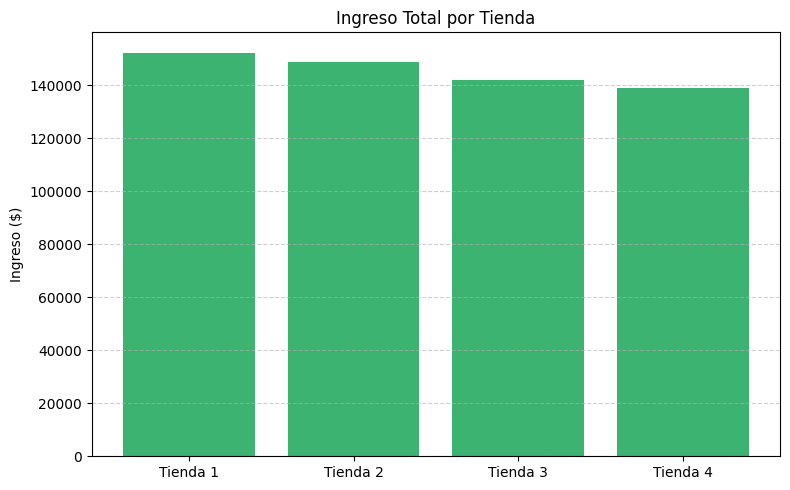

---

### 2. Calificaciones Promedio de Clientes

Las calificaciones reflejan la satisfacción general de los clientes con cada tienda:

```
📋 Calificación Promedio por Tienda:

 Tienda 1         3.98
 Tienda 2         4.04
 Tienda 3         4.05
 Tienda 4         4.00
```

📌 *Gráfico de líneas incluido previamente.*

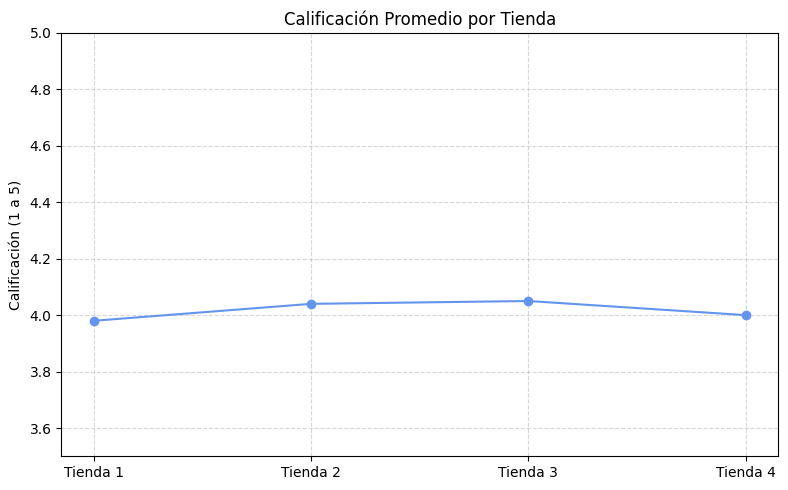
---

### 3. Costo de Envío Promedio

El costo logístico promedio por tienda fue:

- Tienda 1: $26.02

- Tienda 2: $25.22

- Tienda 3: $24.81  

- Tienda 4: $23.46

Tienda 4 presenta el menor costo de envío, lo cual puede ser una fortaleza desde el punto de vista logístico.

---

### 4. Productos Más y Menos Vendidos

Cada tienda presentó diferentes comportamientos en cuanto a rotación de productos. Tienda 1 y Tienda 2 destacan con los productos más vendidos, mientras que Tienda 4 y Tienda 3 presentaron más productos con baja demanda.

---

### 5. Distribución de Categorías por Tienda

Se observó que Tienda 1 y Tienda 2 concentran mayores ventas en categorías clave como Electrónica y Hogar, mientras que Tienda 4 tiene una distribución menos definida.

📌 *Gráfico de pastel de categorías mostrado en la celda anterior.*

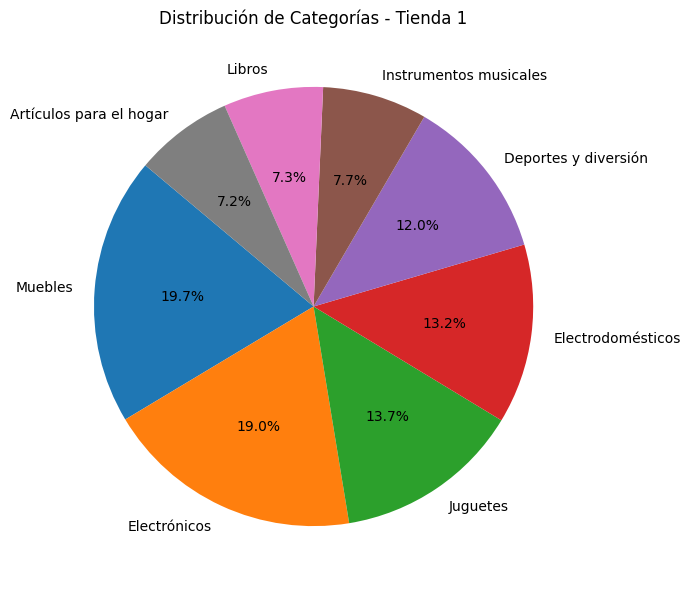
---

## ✅ Conclusión y Recomendación

Luego de analizar todos los factores, se concluye que:

- **Tienda 3** tiene la mejor calificación promedio, pero un desempeño comercial limitado.
- **Tienda 1** lidera en ingresos y ventas, aunque con la calificación más baja.
- **Tienda 4**, a pesar de tener el costo logístico más bajo, presenta **los menores ingresos, menor volumen de ventas y menor rotación de productos**.

📌 **Recomendación final:**  
Se sugiere que el Sr. Juan considere **vender o cerrar Tienda 4**, ya que es la menos rentable y con menor actividad. El capital recuperado puede invertirse en reforzar las operaciones de las tiendas con mejor rendimiento, como Tienda 1 o Tienda 2.

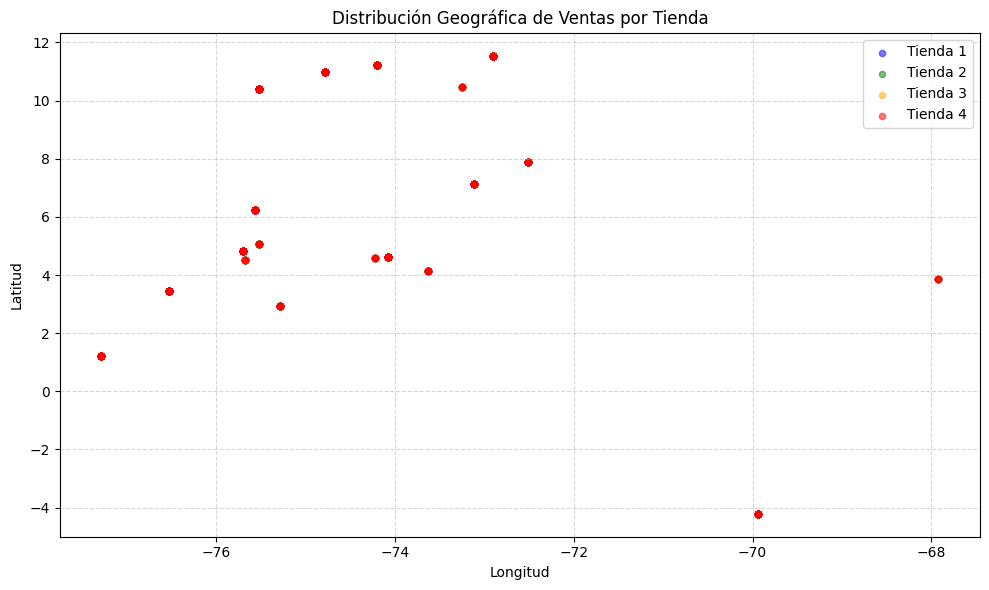

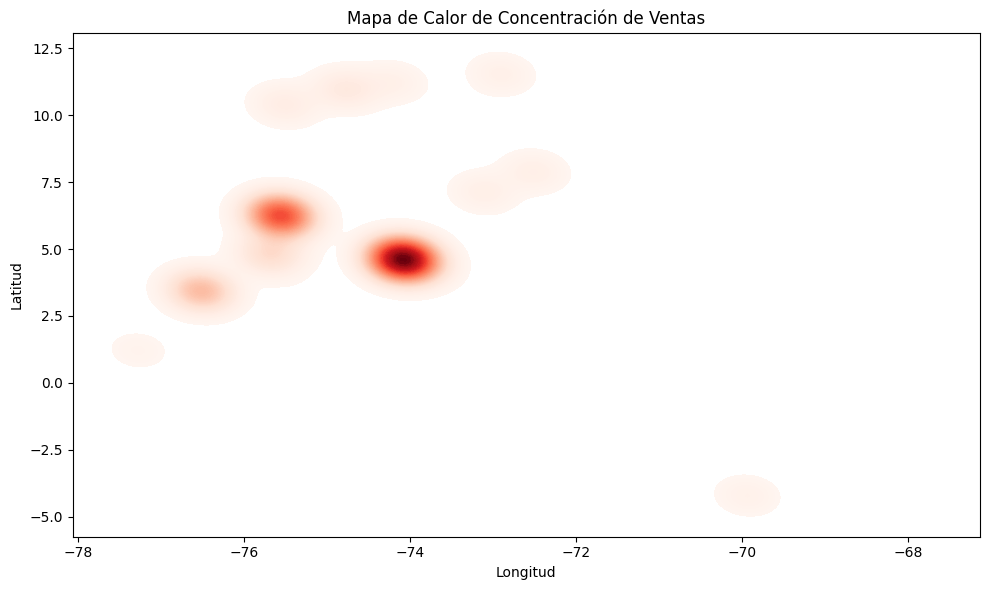

📍 Ubicación geográfica promedio de las ventas por tienda:
          lat  lon
Tienda            
Tienda 1    5  -75
Tienda 2    5  -75
Tienda 3    5  -75
Tienda 4    5  -75


In [153]:
import pandas as pd

# Cargar y etiquetar tiendas
url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1); tienda1["Tienda"] = "Tienda 1"
tienda2 = pd.read_csv(url2); tienda2["Tienda"] = "Tienda 2"
tienda3 = pd.read_csv(url3); tienda3["Tienda"] = "Tienda 3"
tienda4 = pd.read_csv(url4); tienda4["Tienda"] = "Tienda 4"

df = pd.concat([tienda1, tienda2, tienda3, tienda4], ignore_index=True)
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
colors = {"Tienda 1": "blue", "Tienda 2": "green", "Tienda 3": "orange", "Tienda 4": "red"}

for tienda in df["Tienda"].unique():
    subset = df[df["Tienda"] == tienda]
    plt.scatter(subset["lon"], subset["lat"], label=tienda, alpha=0.5, s=20, c=colors[tienda])

plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.title("Distribución Geográfica de Ventas por Tienda")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

import seaborn as sns

plt.figure(figsize=(10,6))
sns.kdeplot(
    data=df, x="lon", y="lat", fill=True, cmap="Reds", thresh=0.05, levels=100
)
plt.title("Mapa de Calor de Concentración de Ventas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.tight_layout()
plt.show()

# Agrupar por tienda y calcular lat/lon promedio
ubicacion_promedio = df.groupby("Tienda")[["lat", "lon"]].mean().round(4)
print("📍 Ubicación geográfica promedio de las ventas por tienda:")
print(ubicacion_promedio)
